In [31]:
import pandas as pd  #For data manipulation and analysis
import numpy as np  #For numerical operations
import matplotlib.pyplot as plt  #For data visualization
from sklearn.model_selection import train_test_split  #For splitting the dataset into training and testing sets
from sklearn.preprocessing import LabelEncoder, StandardScaler  #For encoding categorical data
from sklearn.svm import SVC  #For the Support Vector Machine model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score  # For evaluating the model

In [32]:
#Importing the selected dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
print(dataset.head())  # Displaying the first few rows of the dataset

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


The first few rows of the dataset are displayed to get an overview.

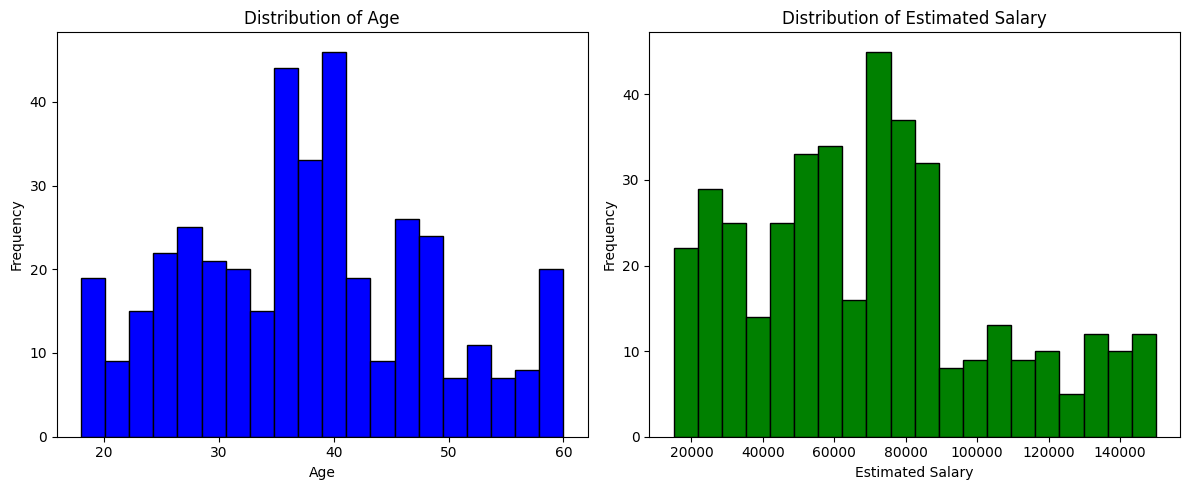

In [33]:
# Visualizing the dataset contents
# Plotting the distribution of 'Age' and 'EstimatedSalary'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(dataset['Age'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(dataset['EstimatedSalary'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


The distribution of 'Age' and 'EstimatedSalary' is plotted to understand the spread of these features.

In [34]:
#Encoding categorical data (Gender)
#Since the second column (index 1) contains the gender column 'Male'/'Female'
labelencoder = LabelEncoder()
dataset.iloc[:, 1] = labelencoder.fit_transform(dataset.iloc[:, 1])  # Encoding 'Male' as 1 and 'Female' as 0

The 'Gender' column is converted from categorical to numerical values using LabelEncoder.

In [35]:
#Splitting the dataset into features and target variable
X = dataset.iloc[:, 1:-1].values  #Features (all columns except the last one)
y = dataset.iloc[:, -1].values  #Target variable (the last column)

x contains all columns except the last column (Purchased) which represents
the features and y contains only the last column (Purchased) which represents the target variable.

In [36]:
#Splitting the dataset into training, validation and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)  # 60% training, 40% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20% validation, 20% test

The dataset is split into 60% training, 20% validation, and 20% testing sets.

In [37]:
#Feature scaling for better performance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # Scaling training data
X_val = sc.transform(X_val)  # Scaling validation data
X_test = sc.transform(X_test)  # Scaling test data

In [38]:
#Setting up the selected ML model
svm = SVC(kernel='linear', random_state=42)  #Used a linear kernel, which means the decision boundary is a straight line

In [39]:
#Training the ML model with the given dataset
svm.fit(X_train, y_train)



SVC(kernel='linear', random_state=42)

In [40]:
#evaluate on the validation set during training for hyperparameter tuning
val_predictions = svm.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.825


Accuracy: 0.875
Confusion Matrix:
[[43  2]
 [ 8 27]]


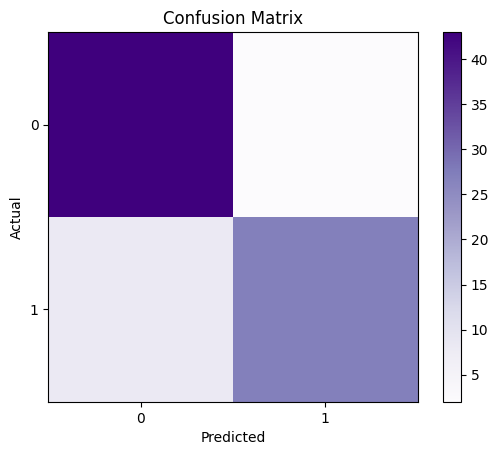

In [41]:
#Testing and evaluating the trained ML model against the test dataset and reporting the result visually
y_pred = svm.predict(X_test)

#Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)

#Visualizing the results
plt.imshow(confusion, cmap='Purples', interpolation='nearest')  #designing the confusion matrix
plt.title('Confusion Matrix')  #title of the plot
plt.colorbar()  #adding a color bar to indicate the scale of values
plt.xlabel('Predicted')  #x-axis
plt.ylabel('Actual')  #y-axis

#Setting the ticks for x and y axis based on the unique labels in the target variable
plt.xticks(np.arange(len(set(y))), set(y))
plt.yticks(np.arange(len(set(y))), set(y))

plt.show()  #Display the plot


The model achieved an accuracy of 87.5% on the test set indicating strong overall performance. The confusion matrix shows 43 true negatives, 27 true positives, 2 false positives, and 8 false negatives suggesting the model is more accurate at predicting non-purchases.